In [1]:
import graphlab as gl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import selectivesearch
from skimage import io, transform
import time
gl.canvas.set_target('ipynb')

[WARNING] Unable to write current GraphLab Create license to /home/xeraph/.graphlab/config. Ensure that this user account has write permission to /home/xeraph/.graphlab/config to save the license for offline use.
[INFO] This non-commercial license of GraphLab Create is assigned to wangdelp@gmail.com and will expire on February 09, 2017. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-24058 - Server binary: /usr/local/lib/python2.7/dist-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1455857311.log
[INFO] GraphLab Server Version: 1.8.1
[WARNING] Unable to create session in specified location: '/home/xeraph/.graphlab/artifacts'. Using: '/var/tmp/graphlab-xeraph/24058/tmp_session_ca862eb9-6160-4254-b823-c84ef5486607'


In [2]:
image_path = '../data/demo/imgs/20141_cols30a_01_PE376670.jpg' 
image_path = '../data/demo/imgs/living_room.jpg' 

15.7218680382s


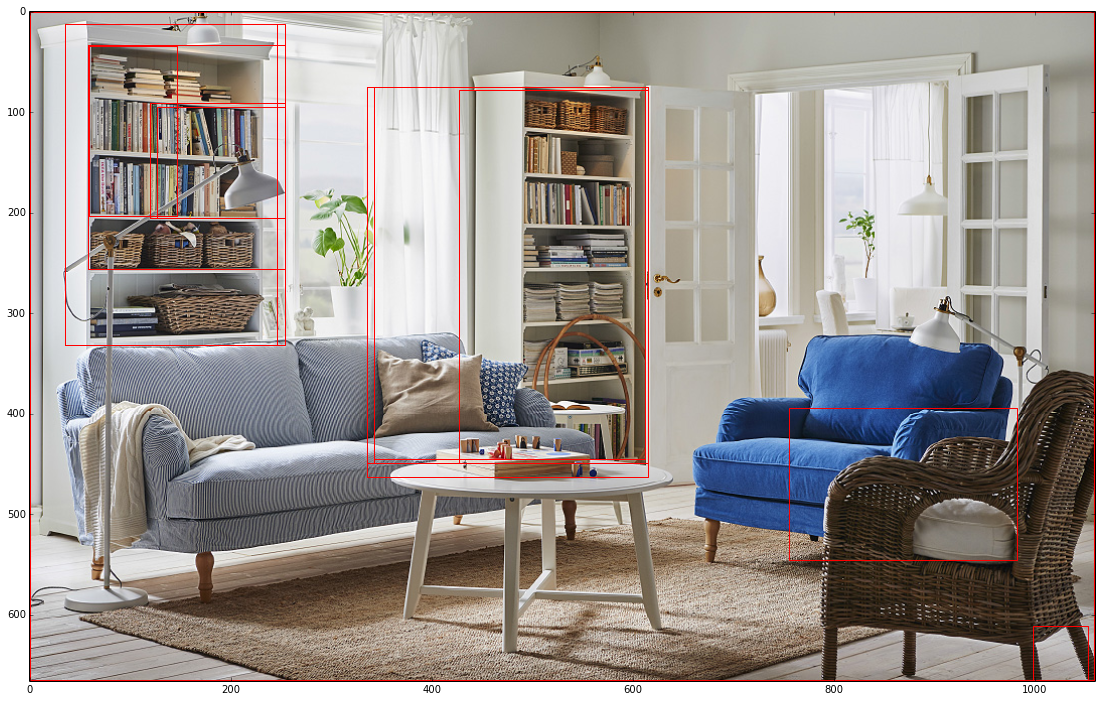

In [3]:
%matplotlib inline

img = io.imread(image_path)
def get_candidates(img, scale=1000, sigma=2, min_size=50):
    t = time.time()
    img_lbl, regions = selectivesearch.selective_search(
                                                        img, 
                                                        scale=scale, 
                                                        sigma=sigma, 
                                                        min_size=min_size)
    print str(time.time() -t) + "s"
    candidates = set()

    for r in regions:
        x, y, w, h = r['rect']
            # excluding same rectangle (with different segments)
        if r['rect'] in candidates:
            continue
            # excluding regions smaller than 2000 pixels
        if r['size'] < 2000:
            continue
            # distorted rects
        if w / h > 1.2 or h / w > 1.2:
            continue

        candidates.add(r['rect'])
        
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20, 12))
    ax.imshow(img)

    for x, y, w, h in candidates:
        rect = mpatches.Rectangle(
                (x, y), w, h, fill=False, edgecolor='red', linewidth=1)

        ax.add_patch(rect)
        
    return candidates

candidates = get_candidates(img)

In [5]:
candidates

{(0, 0, 1059, 665),
 (35, 12, 211, 320),
 (35, 12, 219, 320),
 (58, 33, 196, 223),
 (59, 34, 88, 169),
 (120, 91, 134, 114),
 (127, 95, 127, 110),
 (336, 75, 279, 374),
 (336, 75, 279, 388),
 (343, 75, 269, 370),
 (343, 75, 272, 374),
 (427, 78, 188, 371),
 (755, 394, 227, 151),
 (998, 611, 55, 54)}

In [6]:
def save_crops(img):
    import scipy
    count=0
    for x, y, w, h in candidates:    
        cropped = img[y:y+h, x:x+w, :]
        scipy.misc.imsave('crop_%d.jpg'%count, cropped)
        count+=1
        
save_crops(img)

> <ipython-input-6-e7dc2e2d4a99>(6)save_crops()
      4     import ipdb
      5     ipdb.set_trace()
----> 6     for x, y, w, h in candidates:
      7         cropped = img[y:y+h, x:x+w, :]
      8         scipy.misc.imsave('crop_%d.jpg'%count, cropped)

ipdb> c


In [7]:
cand_sf = gl.image_analysis.load_images('./')
cand_sf['image'].show()

PROGRESS: Unsupported image format. Supported formats are JPG and PNG	 file: /home/xeraph/py-faster-rcnn/tools/.ipynb_checkpoints/cubist-checkpoint.ipynb
PROGRESS: Unsupported image format. Supported formats are JPG and PNG	 file: /home/xeraph/py-faster-rcnn/tools/image_database_matching.py
PROGRESS: Unsupported image format. Supported formats are JPG and PNG	 file: /home/xeraph/py-faster-rcnn/tools/compress_net.py
PROGRESS: Unsupported image format. Supported formats are JPG and PNG	 file: /home/xeraph/py-faster-rcnn/tools/.demo.py.swp
PROGRESS: Unsupported image format. Supported formats are JPG and PNG	 file: /home/xeraph/py-faster-rcnn/tools/README.md
PROGRESS: Unsupported image format. Supported formats are JPG and PNG	 file: /home/xeraph/py-faster-rcnn/tools/_init_paths.py
PROGRESS: Unsupported image format. Supported formats are JPG and PNG	 file: /home/xeraph/py-faster-rcnn/tools/.rpn_matching.py.swp
PROGRESS: Unsupported image format. Supported formats are JPG and PNG	 file: /

In [9]:
cand_sf.print_rows()
cand_sf['image'].

+-------------------------------+-------------------------+
|              path             |          image          |
+-------------------------------+-------------------------+
| /home/xeraph/py-faster-rcn... |  Height: 388 Width: 279 |
| /home/xeraph/py-faster-rcn... |  Height: 371 Width: 188 |
| /home/xeraph/py-faster-rcn... | Height: 665 Width: 1059 |
| /home/xeraph/py-faster-rcn... |  Height: 320 Width: 211 |
| /home/xeraph/py-faster-rcn... |  Height: 114 Width: 134 |
| /home/xeraph/py-faster-rcn... |  Height: 169 Width: 88  |
| /home/xeraph/py-faster-rcn... |  Height: 320 Width: 219 |
| /home/xeraph/py-faster-rcn... |  Height: 110 Width: 127 |
| /home/xeraph/py-faster-rcn... |  Height: 223 Width: 196 |
| /home/xeraph/py-faster-rcn... |  Height: 151 Width: 227 |
+-------------------------------+-------------------------+
[14 rows x 2 columns]



dtype: Image
Rows: 14
['Height: 388 Width: 279', 'Height: 371 Width: 188', 'Height: 665 Width: 1059', 'Height: 320 Width: 211', 'Height: 114 Width: 134', 'Height: 169 Width: 88', 'Height: 320 Width: 219', 'Height: 110 Width: 127', 'Height: 223 Width: 196', 'Height: 151 Width: 227', 'Height: 54 Width: 55', 'Height: 374 Width: 279', 'Height: 370 Width: 269', 'Height: 374 Width: 272']

In [14]:
#dfe = gl.feature_engineering.DeepFeatureExtractor('image', model='auto', output_column_prefix=feat)
dfe = gl.load_model('./alexnet.gl')

In [15]:
def transform_and_build_nn(cand_sf, radius, k):   
    cand_sf = dfe.transform(cand_sf)
    cand_sf = cand_sf.add_row_number()
    db_sf = gl.SFrame('/Users/charlie/Downloads/features_sframe.gl')
    db_sf = db_sf.add_row_number()
    nn = gl.nearest_neighbors.create(db_sf,features=['deep_features.image'],distance='cosine')
    neighbors = nn.query(cand_sf,radius=radius,k=k)
    return neighbors, db_sf, cand_sf

In [16]:
neighbors, db_sf, cand_sf = transform_and_build_nn(cand_sf, .51, 2)

PROGRESS: Images being resized.
PROGRESS: Starting brute force nearest neighbors model training.
PROGRESS: Starting blockwise querying.
PROGRESS: max rows per data block: 7668
PROGRESS: number of reference data blocks: 4
PROGRESS: number of query data blocks: 1
PROGRESS: +--------------+---------+-------------+--------------+
PROGRESS: | Query points | # Pairs | % Complete. | Elapsed Time |
PROGRESS: +--------------+---------+-------------+--------------+
PROGRESS: | 36           | 252     | 25          | 13.716ms     |
PROGRESS: | Done         | 1008    | 100         | 15.195ms     |
PROGRESS: +--------------+---------+-------------+--------------+


In [17]:
neighbors

Columns:
	query_label	int
	reference_label	int
	distance	float
	rank	int

Rows: 6

Data:
+-------------+-----------------+----------------+------+
| query_label | reference_label |    distance    | rank |
+-------------+-----------------+----------------+------+
|      9      |        27       | 0.378195904197 |  1   |
|      9      |        23       | 0.484812141677 |  2   |
|      29     |        23       | 0.411783041233 |  1   |
|      29     |        27       | 0.501560271949 |  2   |
|      31     |        21       | 0.509809813257 |  1   |
|      35     |        23       | 0.440835555233 |  1   |
+-------------+-----------------+----------------+------+
[6 rows x 4 columns]

In [18]:
def image_join(neighbors, db_sf, cand_sf, query_id):
    tmp_nn = neighbors[neighbors['query_label'] == query_id]
    tmp_db = db_sf.filter_by(tmp_nn['reference_label'], 'id')
    cand = cand_sf[cand_sf['id'] == query_id]
    return cand.append(tmp_db)

In [20]:
image_join(neighbors, db_sf, cand_sf, 9)['image'].show()

In [21]:
image_join(neighbors, db_sf, cand_sf, 31)['image'].show()

In [24]:
! rm crop*

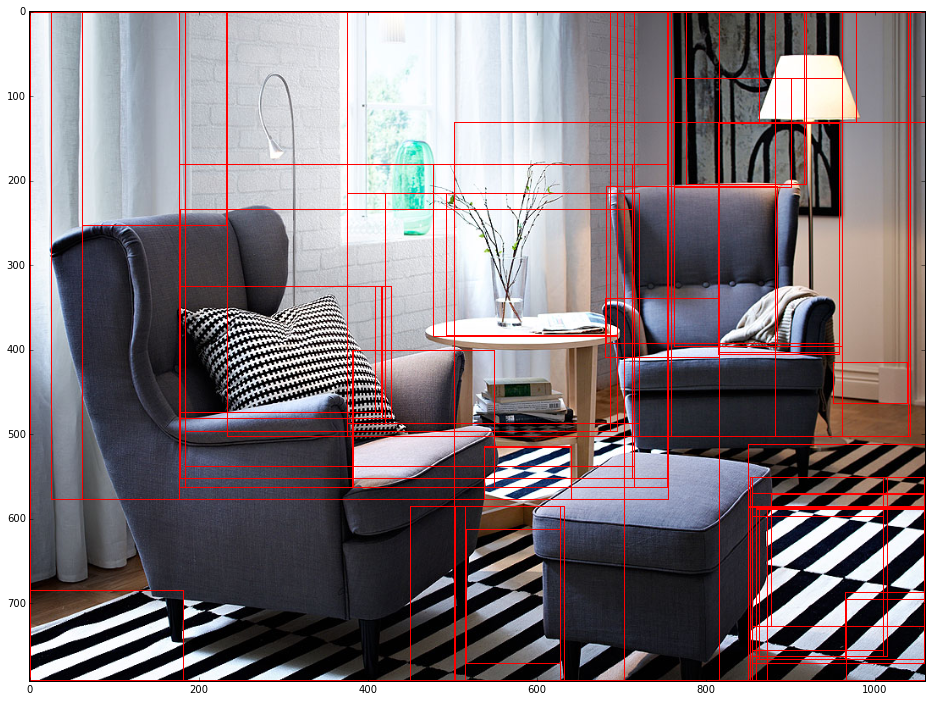

In [25]:
img = io.imread('/Users/charlie/Desktop/20134_cols06a_01_PE362778.jpg', sigma=4, 
                                                                        scale=1250, 
                                                                        min_size=100)
candidates = get_candidates(img)
save_crops(img)

In [26]:
cand_sf = gl.image_analysis.load_images('./')
cand_sf['image'].show()

PROGRESS: Unsupported image format. Supported formats are JPG and PNG	 file: /Users/charlie/Desktop/cropped_images/alexnet.gl/pickle_archive
PROGRESS: Unsupported image format. Supported formats are JPG and PNG	 file: /Users/charlie/Desktop/cropped_images/alexnet.gl/ec446dcf-e5a3-4986-b090-50b56e1477b2/objects.bin
PROGRESS: Unsupported image format. Supported formats are JPG and PNG	 file: /Users/charlie/Desktop/cropped_images/alexnet.gl/version
PROGRESS: Unsupported image format. Supported formats are JPG and PNG	 file: /Users/charlie/Desktop/cropped_images/alexnet.gl/ec446dcf-e5a3-4986-b090-50b56e1477b2/dir_archive.ini


In [27]:
neighbors, db_sf, cand_sf = transform_and_build_nn(cand_sf,.6,2)

PROGRESS: Images being resized.
PROGRESS: Starting brute force nearest neighbors model training.
PROGRESS: Starting blockwise querying.
PROGRESS: max rows per data block: 7668
PROGRESS: number of reference data blocks: 4
PROGRESS: number of query data blocks: 1
PROGRESS: +--------------+---------+-------------+--------------+
PROGRESS: | Query points | # Pairs | % Complete. | Elapsed Time |
PROGRESS: +--------------+---------+-------------+--------------+
PROGRESS: | 76           | 532     | 25          | 15.217ms     |
PROGRESS: | Done         | 2128    | 100         | 17.613ms     |
PROGRESS: +--------------+---------+-------------+--------------+


In [29]:
neighbors

Columns:
	query_label	int
	reference_label	int
	distance	float
	rank	int

Rows: 7

Data:
+-------------+-----------------+----------------+------+
| query_label | reference_label |    distance    | rank |
+-------------+-----------------+----------------+------+
|      0      |        20       | 0.573968643515 |  1   |
|      0      |        0        | 0.582742984623 |  2   |
|      14     |        15       | 0.532066749905 |  1   |
|      21     |        15       | 0.548258178841 |  1   |
|      39     |        15       | 0.554633777979 |  1   |
|      53     |        15       | 0.556822725453 |  1   |
|      72     |        25       | 0.565777797692 |  1   |
+-------------+-----------------+----------------+------+
[7 rows x 4 columns]

In [30]:
image_join(neighbors, db_sf, cand_sf, 0)['image'].show()

In [33]:
image_join(neighbors, db_sf, cand_sf, 14)['image'].show()